In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import mplcyberpunk as mplnk
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [19]:
import sys
import os
from pathlib import Path
path = Path('S:/Projects/Zillow') #replace with your root path
sys.path.append(os.path.abspath(path))
from config.config import Config

In [20]:
df = pd.read_csv(Config.PROCESSED_DATA_FILE, index_col=0)

In [21]:
df.head()

,region,state,metro,county,year,month,timestamp,median_price
0,New York,NY,New York-Newark-Jersey City,Queens County,2010,1,2010-01-01,NaN
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2010,1,2010-01-01,NaN
2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,2010,1,2010-01-01,NaN
3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2010,1,2010-01-01,NaN
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,2010,1,2010-01-01,NaN


## EDA

- Find the region-state-metro-county combination that has the highest number of non-null median prices against timestamps.

In [22]:
price_counts = df.groupby(['region', 'state', 'metro', 'county'])['median_price'].count()
max_combination = price_counts.idxmax()
max_combination

('Port Saint Lucie', 'FL', 'Port St. Lucie', 'Saint Lucie County')

- Plot the obtained RSMC combination's against timestamps

In [23]:
max_df = df[
    (df['region'] == max_combination[0]) &
    (df['state'] == max_combination[1]) &
    (df['metro'] == max_combination[2] )&
    (df['county'] == max_combination[3])
]

In [24]:
fig = px.line(max_df, x='timestamp', y='median_price', title='Median Price Over Time',
              labels={'timestamp': 'Timestamp', 'median_price': 'Median Price'},
              template='plotly_dark')
fig.update_layout(width=1000, height=500)
fig.show()

- Plot the autocorrelation metric

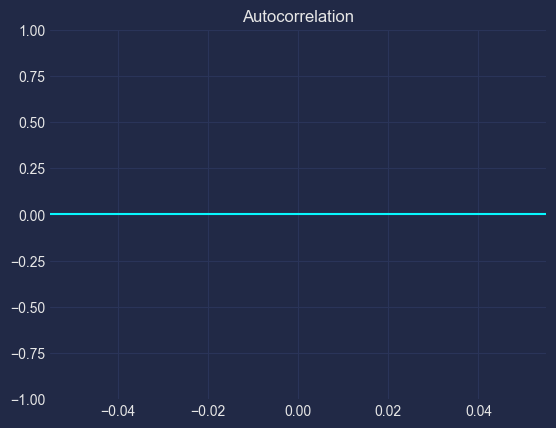

In [25]:
plt.style.use('cyberpunk')
plot_acf(df['median_price'], lags=50)
plt.show()

In [26]:
df.head()

,region,state,metro,county,year,month,timestamp,median_price
0,New York,NY,New York-Newark-Jersey City,Queens County,2010,1,2010-01-01,NaN
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2010,1,2010-01-01,NaN
2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,2010,1,2010-01-01,NaN
3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2010,1,2010-01-01,NaN
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,2010,1,2010-01-01,NaN


In [30]:
cat_columns = [0, 1, 2, 3]
label_encoder = LabelEncoder()
X, y = df[df.columns[:6]].values, df['median_price'].values
for col in cat_columns:
    X[:, col] = label_encoder.fit_transform(X[:, col])

In [31]:
pca = PCA(n_components=1)
X_decomposed = pca.fit_transform(X)

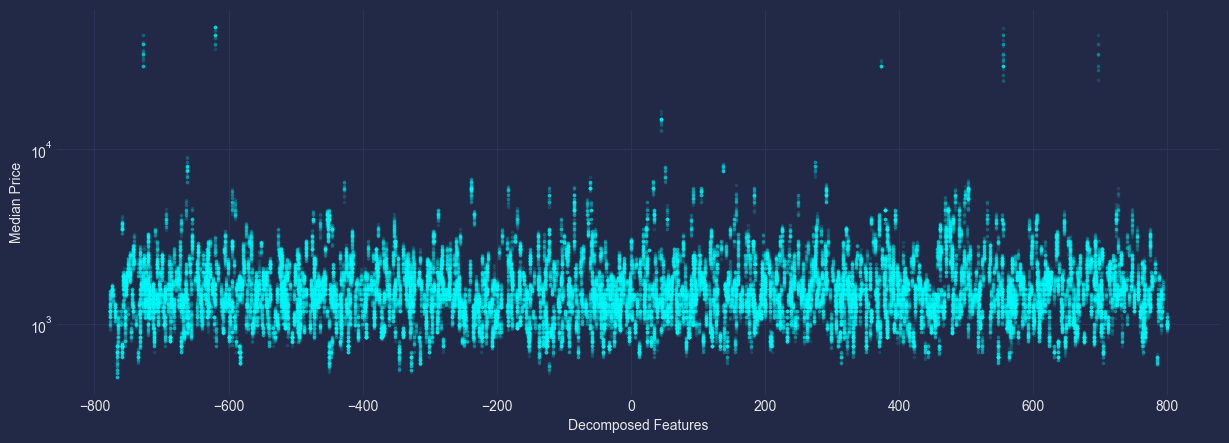

In [47]:
plt.figure(figsize=(15, 5))
plt.scatter(X_decomposed, y, c='aqua', alpha=0.1, s=3)
plt.xlabel("Decomposed Features")
plt.ylabel("Median Price")
plt.yscale('log')
plt.show()